In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Trabajo Practico N°1
## Alumno: Gonzalo Carvallo (i0810)

En el siguiente trabajo se usará el dataset de vinos proveniente de [Kaggle](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009). El mismo contiene datos de vino portugués "Vinho Verde" en la variante tinta. Se cuenta con variables fisicoquímicas (entradas) y un puntaje de clasificación de tipo de vino. 

### **Ejercicio 1**: Lea el dataset como un DataFrame de Pandas. Realice un estudio de variables. Como se llaman y que están midiendo exactamente (vea la documentación del dataset). Además, analice que tipo de variables (incluido el target) son, cuál es el rango de estas variables y cómo se distribuyen (histograma). Además, realice una matriz de correlación, ¿cuáles variables parecen estar correlacionadas? y con respectos a la calidad del vino?

Se realiza lectura del dataset como un DataFrame de Pandas. 

In [6]:
# Leemos el dataset
wine_df = pd.read_csv("datasets/winequality-red.csv")

Leemos las primeras 10 lineas del dataset para poder hacer un estudio de variables.

In [7]:
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


De acuerdo a la documentacion del dataset, observamos que sus atributos son:

- `fixed acidity`: Acidez fija. Corresponde al conjunto de ácidos orgánicos de baja volatilidad como el ácido málico, láctico, tartárico o cítrico y es inherente a las características de la muestra. Está medido en g/dm3.
- `volatile acidity`: Acidez Volatil. Corresponde al conjunto de ácidos orgánicos de cadena corta que pueden extraerse de la muestra mediante un proceso de destilación: ácido fórmico, ácido acético, ácido propiónico y ácido butírico. Está medido en g/dm3.
- `citric acid`: Es un ácido orgánico débil, que a menudo se usa como conservante o aditivo natural en alimentos o bebidas para agregar un sabor amargo a los alimentos. Está medido en g/dm3.
- `residual sugar`: Proviene de los azúcares naturales de la uva que quedan en un vino una vez finalizada la fermentación alcohólica. Se mide en gramos por litro. Está medido en g/dm3.
- `chlorides`: Pueden dar al vino un sabor salado que puede atraer a los consumidores potenciales. Está medido en g/dm3.
- `free sulfur dioxide`: Es un aditivo en la elaboración del vino, que agrega propiedades de antioxidante y conservación. Está medido en mg/dm3.
- `density`: Es la medida de masa divido por volumen. Está medido en g/cm3.
- `pH`: Es una escala utilizada para especificar la acidez o basicidad de una solución acuosa.
- `sulphates`: Son compuestos naturales que se encuentran en todos los vinos. Actúan como conservante al inhibir el crecimiento microbiano. Está medido en g/dm3.
- `alcohol`: El contenido de alcohol del vino varía según el tipo y la marca. Saber cuánto alcohol hay en cada botella de vino sirve para estimar el perfil de sabor del vino. Está medido en vol%.

Y la columna que buscamos predecir es:
- `quality`: Corresponde a la medida de calidad del vino, calculada por al menos tres expertos en una medición ciega. La escala va de 0 (muy malo) a 10 (excelente)

In [8]:
# Veamos una descripción de todas las columnas, que tipo de columna es y si hay datos faltantes
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [25]:
# Veamos una descripción de todas las columnas, que tipo de columna es y si hay datos faltantes
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [28]:
# Verificar si hay datos nulos
print(wine_df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Todas las columnas de atributos son válidas y no hay valores nulos. No existen variables categoricas, solo tenemos variables numericas. Continuas para todos los atributos (float64) salvo el caso de la calidad, que toma valores discretos (int64). Tambien podemos observar en la tabla de descripcion el rango de las variables (maximos y minimos).


Veamos los histogramas de los atributos

[]

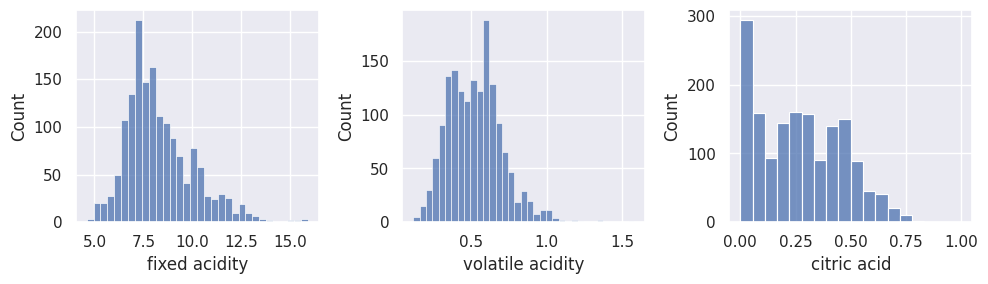

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
sns.histplot(data=wine_df, x="fixed acidity", ax=ax[0])
sns.histplot(data=wine_df, x="volatile acidity", ax=ax[1])
sns.histplot(data=wine_df, x="citric acid", ax=ax[2])
plt.tight_layout()
plt.plot()

[]

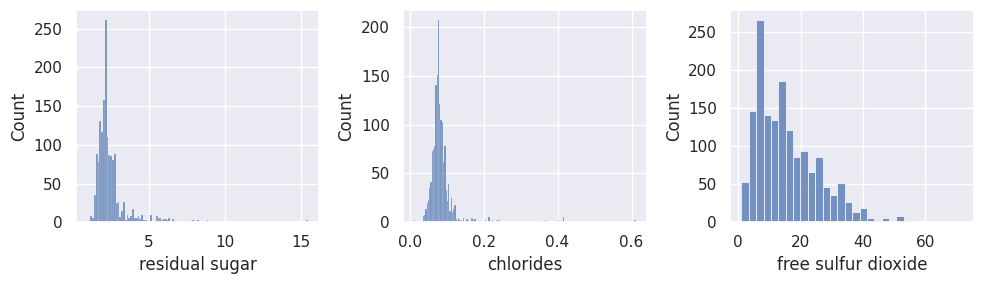

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
sns.histplot(data=wine_df, x="residual sugar", ax=ax[0])
sns.histplot(data=wine_df, x="chlorides", ax=ax[1])
sns.histplot(data=wine_df, x="free sulfur dioxide", ax=ax[2])
plt.tight_layout()
plt.plot()

[]

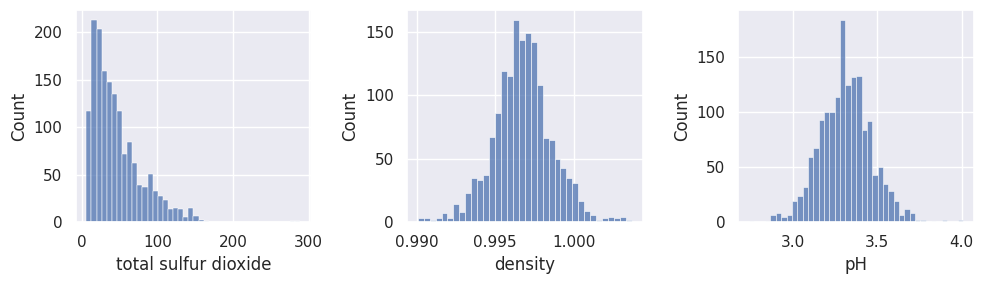

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
sns.histplot(data=wine_df, x="total sulfur dioxide", ax=ax[0])
sns.histplot(data=wine_df, x="density", ax=ax[1])
sns.histplot(data=wine_df, x="pH", ax=ax[2])
plt.tight_layout()
plt.plot()

[]

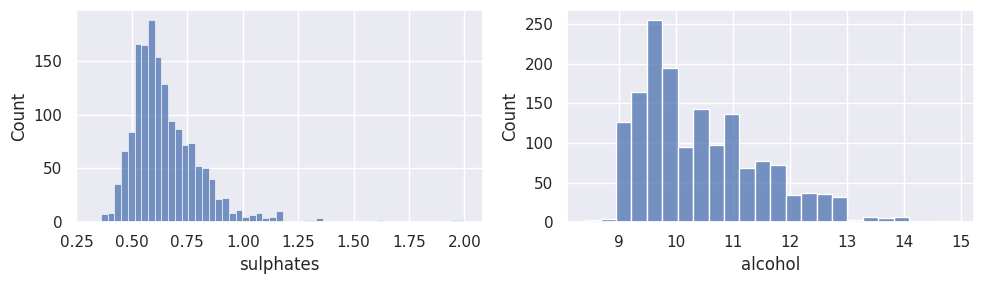

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(data=wine_df, x="sulphates", ax=ax[0])
sns.histplot(data=wine_df, x="alcohol", ax=ax[1])
plt.tight_layout()
plt.plot()

De los histogramas de los atributos, vemos que casi todos los atributos tienen distribuciones de datos en forma de campana. Además los atributos `residual sugar` y `chlorides` tienen a simple vista valores alejados. 

Ahora analizamos la distribución de `quality`, que es la Calidad, o sea nuestro target:

<Axes: >

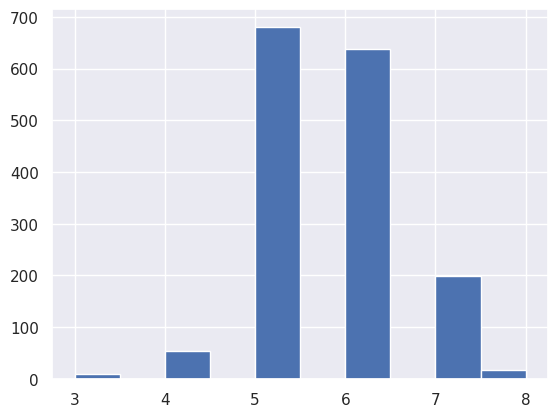

In [22]:
wine_df["quality"].hist()

Vemos que los vinos de calidad 5, 6 y 7 son muchos mas comunes.

Ahora armamos la matriz de correlación entre de todas las columnas del dataset:

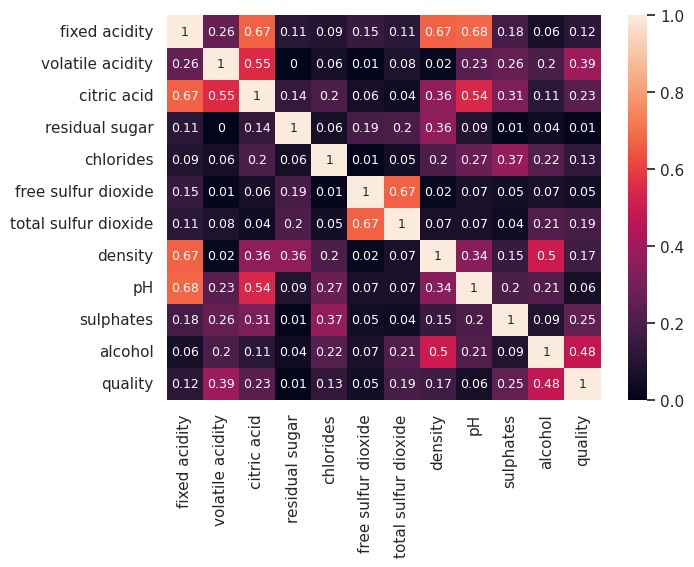

In [23]:
plt.figure(figsize=(7, 5))
sns.heatmap(data=np.abs(wine_df.corr().round(2)), annot=True, annot_kws={"size": 9})
plt.show()

Vemos que con respecto al target los atributos con mayor correlación son:
- `alcohol`
- `volatile acidity` 
- `sulphates`
- `citric acid`

Y luego vemos que algunos atributos están correlacionados entre si:

- `fixed acidity` con `pH`, `density` y `citric acid`
- `volatile acidity` y `citric acid`
- `pH` y `citric acid`

Recordemos que haya correlación entre atributos no es algo deseable. Una alta correlación entre atributos puede causar que sea difícil discernir la contribución individual de cada atributo al modelo. Si dos atributos están altamente correlacionados, puede significar que ambos proporcionan información similar. En algunos casos, esto puede ser redundante y no agregar valor adicional al modelo. En este caso vemos que la correlacion se da en atributos vinculados a la "acidez".


### **Ejercicio 2**: Realice si es necesario limpieza de datos y corrección de errores.

Verificamos en el punto anterior que no existen datos nulos y que las variables son del tipo correcto. Para mejorar el modelo podemos considerar eliminar los datos alejados (outliers). De acuerdo a los histogramas del punto anterior vemos que `residual sugar` y `chlorides` son los que muestran mayor *distancia* en los datos alejados respecto a las zonas de mayor densidad.

Visualizamos estos 2 atributos en graficos de dispersión:

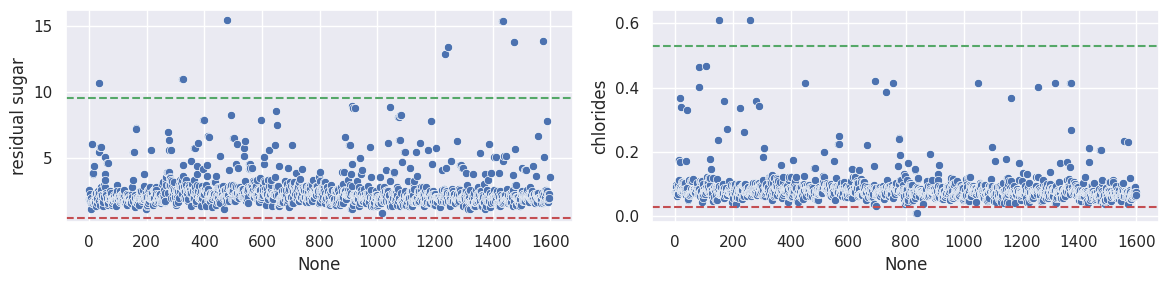

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
# Gráfico de dispersión para 'residual sugar'
sns.scatterplot(x=wine_df.index, y=wine_df['residual sugar'], ax=ax[0])
ax[0].axhline(y=Q1 - 2 * IQR, color='r', linestyle='--')
ax[0].axhline(y=Q3 + 10 * IQR, color='g', linestyle='--')

# Gráfico de dispersión para 'chlorides'
sns.scatterplot(x=wine_df.index, y=wine_df['chlorides'], ax=ax[1])
Q1_chlorides = wine_df['chlorides'].quantile(0.25)
Q3_chlorides = wine_df['chlorides'].quantile(0.75)
IQR_chlorides = Q3_chlorides - Q1_chlorides
ax[1].axhline(y=Q1_chlorides - 2 * IQR_chlorides, color='r', linestyle='--')
ax[1].axhline(y=Q3_chlorides + 22 * IQR_chlorides, color='g', linestyle='--')

plt.tight_layout() 
plt.show()


Se agregaron lineas de rango intercuartílico (IQR) con factores de escala arbitrarios para visualizar cortes tentativos.

Observando la naturaleza completa del dataset, se aprecia en casi todos los atributos la presencia de valores atípicos o outliers. Por este motivo, para la evaluacion del modelo, se usará la métrica *Mean Absolute Error (MAE)* ya que la misma tiene  capacidad para proporcionar una evaluación equitativa de los errores, independientemente de su magnitud. Dado que MAE no eleva los errores al cuadrado, no amplifica desproporcionadamente la influencia de los valores alejados en la función de pérdida, en contraste con *Mean Squared Error (MSE)*. En situaciones donde valores extremos pueden distorsionar la interpretación de la calidad del modelo, MAE emerge como una opción apropiada al penalizar todos los errores por igual. Esta métrica se alinea con la preferencia de una penalización uniforme de los errores, ofreciendo una visión más equilibrada de la eficacia del modelo en presencia de datos atípicos.

### **Ejercicio 3**: Construya un modelo de regresión lineal simple, el cual se intente predecir la calidad del vino usando el nivel de alcohol.
	1. Realiza la separación entre el dataset de entrenamiento y testeo. Utilice 80%-20%.

In [106]:
# Obtenemos a X e y. Recordar que X debe ser un array de dos dimensiones
X = wine_df[["alcohol"]]
y = wine_df["quality"]

print(f"La forma de X es {X.shape}")
print(f"La forma de y es {y.shape}")

La forma de X es (1599, 1)
La forma de y es (1599,)


In [107]:
# Separamos el dataset en training y test
from sklearn.model_selection import train_test_split

# Como no hay una buena distribucion de valores entre las calidades de vino, usamos el argumento opcional 
# para que se mantenga la proporcion en los conjuntos de entrenamiento y testeo. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


	2. Determine que métrica se va a usar para evaluar la calidad del modelo (MSE, MAE, etc.)
En función de lo analizado en el **ejercicio 2**, vamos a usar a **MAE**.

In [108]:
from sklearn.metrics import r2_score, mean_absolute_error

	3. Entrene el modelo con el set de entrenamiento.


In [109]:
# Creamos el modelo
from sklearn.linear_model import LinearRegression
lin_reg_simple = LinearRegression()

# Y lo entrenamos, con el set de entrenamiento
lin_reg_simple.fit(X_train, y_train)


LinearRegression()

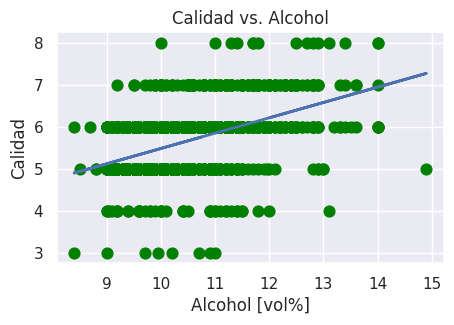

In [110]:
# Esto es extra, veamos graficamente la recta:
plt.figure(figsize=(5, 3))
plt.title('Calidad vs. Alcohol')
plt.xlabel('Alcohol [vol%]')
plt.ylabel('Calidad')

plt.scatter(X_train, y_train, color='green', marker="o", s=60)
plt.plot(X_train, lin_reg_simple.predict(X_train), color="b", linewidth=2)
plt.show()

	4. Evalúe el modelo con la métrica de evaluación y el coeficiente de Pearson.

In [112]:
# Obtenemos la predicción del modelo
y_pred = lin_reg_simple.predict(X_test)

# Calculamos R cuadrado y el error absoluto medio
r2score_simple = r2_score(y_test, y_pred)
mae_simple = mean_absolute_error(y_test, y_pred)

print(f"El coeficiente de Pearson del set de testeo es: {lin_reg_simple.score(X_train, y_train)}")
print(f"R cuadrado es: {r2score_simple}")
print(f"El error absoluto medio es: {mae_simple}")


El coeficiente de Pearson del set de testeo es: 0.23155091505246328
R cuadrado es: 0.2070421320468614
El error absoluto medio es: 0.5792346199169991


### **Ejercicio 4**: Construya un modelo de regresión lineal múltiple, usando todos los atributos
	1. Realiza la separación entre el dataset de entrenamiento y testeo. Utilice 80%-20%.

In [113]:
# Obtenemos a X e y. Si usamos drop podemos eliminar filas y columnas, para el caso de todos los atributos, podemos eliminar
# la columna correspondiente al target
X = wine_df.drop(columns="quality") 
y = wine_df["quality"]

print(f"La forma de X es {X.shape}")
print(f"La forma de y es {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


La forma de X es (1599, 11)
La forma de y es (1599,)


    2. Entrene el modelo con el set de entrenamiento.



In [114]:
# Creamos el modelo
lin_reg_multiple = LinearRegression()

# Y lo entrenamos, con el set de entrenamiento
lin_reg_multiple.fit(X_train, y_train)


LinearRegression()

    3. Evalúe el modelo con la métrica de evaluación y el coeficiente de Pearson.

Al igual que en el ejercicio anterior, usaremos la metrica **MAE** (Mean Absolute Error o Error Absoluto Medio) con la finalidad de poder comparar.

In [116]:
# Obtenemos la predicción del modelo
y_pred = lin_reg_multiple.predict(X_test)

# Calculamos R cuadrado y el error absoluto medio
r2score_multiple = r2_score(y_test, y_pred)
mae_multiple = mean_absolute_error(y_test, y_pred)

print(f"El coeficiente de Pearson del set de testeo es: {lin_reg_multiple.score(X_train, y_train)}")
print(f"R cuadrado es: {r2score_multiple}")
print(f"El error absoluto medio es: {mae_multiple}")


El coeficiente de Pearson del set de testeo es: 0.3561795803353168
R cuadrado es: 0.3702504549078961
El error absoluto medio es: 0.4951190321702555


### **Ejercicio 5**: En función de los resultados obtenidos, discuta los modelos, y que tan bien explican la calidad del vino.

Los resultados del modelo de regresión lineal múltiple en el conjunto de datos indican cierta capacidad para predecir la calidad del vino. El coeficiente R cuadrado del 37.03% indica que alrededor del 63.97% de la variabilidad no se explica, lo que sugiere limitaciones en la capacidad del modelo para explicar la variabilidad total. Además, el error absoluto medio de aproximadamente 0.4951 unidades indica la magnitud promedio de los errores en las predicciones del modelo.

Se concluye en que el modelo tiene cierta capacidad predictiva, pero hay aspectos no capturados y oportunidades para mejorar la precisión mediante la exploración de modelos más complejos o técnicas avanzadas.